## Lab 3: Algorithm Development
This lab builds upon the previous lesson on Deutsch's Algorithm. We will apply this concept to a problem introduced by an Richard Jozsa, appropriately called the Deutsch-Joza problem, which involves determining whether a function of N binary inputs is constant (returns 0 or 1) or balanced (is capable of returning both 0 and 1). The DJ solution reduces run time not by 1/2 as we have seen in the single input problem, but by an exponential factor, exhibiting the power of quantum computing. 

Instead of iterating through 2<sup>N</sup> different inputs to determine the behavior of some function $$f : \{0,1\}^N \rightarrow \{0,1\}$$ The solution, DJ's algorithm, only needs 2 evaluations. Later imporvements by Cleve et al. produced an algorithm that only needs 1. Regardless, a constant number of evaluations is the best complexity we can hope for.

### 3.1 The Classical Solution
The DJ problem was intentionally designed to be challenging for a classical computer, but simple for a quantum one. Lets first observe the runtime of a classical solution.

In a best case scenerio, we can evaluate the function on two different parameters, and we get an output of 0, and 1, respectfully: $f(0,0,0,...) \rightarrow 0$ and $f(1,0,0,...) \rightarrow 1$ This implies the function is balanced, and we are done.

However, in the worst case we need to evaluate $$f(0,0,0,...), f(1,0,0,...), f(0,1,0,...)... etc.$$ to determine whether $f$ is constant. The total possible inputs is 2<sup>N</sup>, so we would have to trial 2<sup>N</sup> + 1 times. 

On average, we need to try half of all possible inputs to get a differing solution, implying a balanced function. But this is still $\frac{2^N}{2}=2^{N-1}$ trials. This is impracticle for very large N.

### 3.2 The Quantum Solution

This problem can be solved by a quantum computer in 1 call to $f(x)$, if we implement $f$ as an quantum oracle that maps states $|x⟩|y⟩ \rightarrow |x⟩|y \oplus f(x)⟩$.

Here, $\oplus$ is the addition modulo 2 opporator. I.e. the XOR opperation we learned early on in this course.

$$|x⟩\oplus|y⟩ = \left\{
                \begin{array}{ll}
                    0 & \mbox{if } x = 0, y = 0 \\
                    1 & \mbox{if } x = 0, y = 1\\
                    1 & \mbox{if } x = 1, y = 0\\
                    0 & \mbox{if } x = 1, y = 1\\
                \end{array}
                \right.
$$

$$
               = \left\{
                \begin{array}{ll}
                    0 & \mbox{if } x = y \\
                    1 & \mbox{if } x \neq y\\
                \end{array}
                \right.
$$

Here is a typical implementation of the algorithm. Let's go through it for insight.

![typical Deutsch-Jozsa implementation](DJ.png)

1. Initialize two registers. The first containing a state of $N$-qubits prepared to $|0⟩$. The second prepared to $|1⟩$. Our overall circuit state is $$|\psi_0⟩=|0⟩^{\otimes N} |1⟩$$

2. Apply a Hadamard gate to each qubit in both registers. This puts the inputs in an equal superposition of all possible states. We do this to engage an interesting phenomanoa of, but not limited to, balanced oracles: phase kickback. $$|\psi_1⟩=|+⟩^{\otimes N}|1⟩=\frac{1}{\sqrt{2^{N+1}}}\sum_{x=0}^{2^N-1}|x⟩(|0⟩-|1⟩)$$

3. Apply the quantum oracle $|x⟩|y⟩$ to $|x⟩|y \oplus f(x)⟩$:
$$|\psi_2⟩=\frac{1}{\sqrt{2^{N+1}}}\sum_{x=0}^{2^N-1}|x⟩(|f(x)⟩-|1\oplus f(x)⟩)$$
$$=\frac{1}{\sqrt{2^{N+1}}}\sum_{x=0}^{2^N-1}(-1)^{f(x)}|x⟩(|0⟩-|1⟩)$$

Here, the math gets tricky. To avoid confusion, let us detour to get a deeper understanding of oracles. 

### 3.2.1 Quantum Oracles
Thus far, the math is likely too complicated to understand off the bat, and the idea of a quantum oracle is still very hand-wavy. Let's consider two types of oracles to get a better understanding.

The two oracles we must understand for this problem are the constant and balanced oracles.

- Constant Oracle: If the oracle $f(x)$ is constant, it has no effect on the input qubits. You can imagine the oracle doesn't even consider the input, it simply has an output 0 or 1.

- Balanced Oracle: The balanced oracle is more interesting. It leverages what's called the phase kickback. Consider what happens if we run a balanced oracle $U_f$ on the input $|x⟩|-⟩$:

$$|\psi⟩=U_f|x⟩|-⟩=\frac{1}{\sqrt{2}}(U_f|x⟩|0⟩-U_f|x⟩|1⟩)=\frac{1}{\sqrt{2}}(|x⟩|f(x)⟩-|x⟩|1 \oplus f(x)⟩)=|x⟩\otimes \frac{1}{\sqrt{2}}(|f(x)⟩-|1 \oplus f(x)⟩).
$$
Now, either $f(x)=0$, or $f(x)=1$. If $f(x)=0$,
$$
|\psi⟩=|x⟩\otimes \frac{1}{\sqrt{2}}(|0⟩-|1⟩)=|x⟩|-⟩
$$
This input is unchanged.
If $f(x)=1$,
$$|\psi⟩=|x⟩\otimes \frac{1}{\sqrt{2}}(|1⟩-|0⟩)=-|x⟩|-⟩$$
There is a phase factor of -1!

We can summarize both cases into a single equation:
$$U_f|x⟩|-⟩=(-1)^{f(x)}|x⟩|-⟩$$

We can use this to simplify $|\psi_3⟩$ to 
$$|\psi_3⟩=|x⟩\otimes \frac{1}{\sqrt{2}}(|0⟩-|1⟩)=\frac{1}{\sqrt{2^{N+1}}}\sum_{x=0}^{2^N-1}(-1)^{f(x)}|x⟩|-⟩$$
This trick is commonly used in quantum algorithms. Now back to DJ!

4. Apply a Hadamard gate to every qubit in the first register. The intuition behind this step is that the Hadamard is its own inverse, so applying it either returns our initial qunatum state if the oracle is constant, or a state orthogonal to the input in the case that the oracle is balanced due to phase kickback. 

Acting a balanced oracle to a state of N qubits negates half of them. This orthogonality between the input and output states implies that if our $f(x)$ is balanced we will *never* measure the all-zero state.

$$|\psi_3⟩=\frac{1}{\sqrt{2^{N+1}}}\sum_{x=0}^{2^N-1}(-1)^{f(x)}H^{\otimes N}|x⟩|-⟩=\frac{1}{2^N}\sum_{x=0}^{2^N-1}(-1)^{f(x)} \left[ \sum_{y=0}^{2^N-1}(-1)^{x\cdot y}|y⟩\right]$$
$$=\frac{1}{2^N}\sum_{y=0}^{2^N-1}(-1)^{f(x)} \left[ \sum_{x=0}^{2^N-1}(-1)^{f(x)}(-1)^{x\cdot y}\right]|y⟩$$

Here we introduce the binary equivalent of the dot product, the bitwise product $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus ... \oplus x_{N-1}y_{N-1}$

A visual representation:


5. Finally we measure the first register. Now, the probability of measuring $|0⟩^{\otimes N}$ is $P(|0⟩^{\otimes N})=|\frac{1}{2^N}\sum_{x=0}^{2^N-1}(-1)^{f(x)}|^2 = \left\{
                \begin{array}{ll}
                    1 & \mbox{if } f(x) \mbox{ is constant}  \\
                    0 & \mbox{if } f(x) \mbox { is balanced} \\
                \end{array}
                \right.$

### 3.3 Algorithm Tools

Often, implementing a quantum algorithm involves abstracting away much of the math (as seen above) into gates that perform equivalent operations. Lets practice creating a quantum oracle in Qiskit.

There are two balanced functions, $f=0$ and $f=1$. they simply require you to do nothing or apply an $X$ gate, repectively. A far more interesting oracle is a balanced one. For example, if we implement the XOR logic gate using the CNOT gate, we can get 0 or 1 based on the two inputs, as we have already explored. Let's simply wrap a series of CNOT gates in an oracle for practice:

In [2]:
!pip install qiskit
!pip install pylatexenc

In [3]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

from qiskit.visualization import plot_histogram

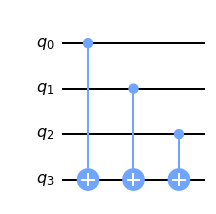

In [4]:
#Set the size of the input register:
n=3

##Initiate a quantum circuit with n+1 qubits
oracle_circuit = #TODO

# Controlled-NOT gates
for qubit in range(n):
    oracle_circuit.cx(qubit, n)
    
oracle_circuit.draw(output='mpl')

In [5]:
#Wrap in custom gate using .to_gate() function
balanced_oracle = oracle_circuit.to_gate()
#check with python's type() function
type(balanced_oracle)

qiskit.circuit.gate.Gate

Great, we have our oracle represented by a gate. Lets practice automating our algorithm for faster testing while we show the new oracle circuit.

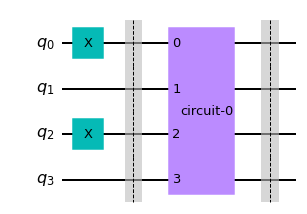

In [6]:
qc = QuantumCircuit(n+1)

#Define string to easily change encoded input (must have length n):
in_str = "101"

# Place X-gates
for qubit in range(len(in_str)):
    if in_str[qubit] == '1':
        qc.x(qubit)

# Use barrier as divider
qc.barrier()

#insert oracle using .append() function
qc.append(balanced_oracle, range(n+1))

qc.barrier()

# Show complete circuit
qc.draw(output = 'mpl')

Here we have a balanced oracle! Let's wrap it once more to see if DJ can solve it! We can also change 'in_str' to test different oracles.

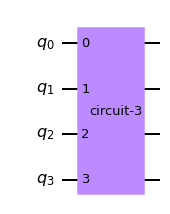

In [7]:
test_f = QuantumCircuit(n+1)
test_f.append(qc, range(n+1))
test_f.draw(output = 'mpl')

### 3.4 Deutsch-Jozsa's Algorithm
Recall step 1, initiallize the input qubits in the $|+⟩$ state and the output qubit in the $|-⟩$ state.

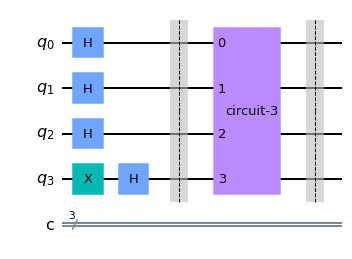

In [12]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
        
# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.barrier()

    
# Add oracle. Note the alternative way to add a gate using the .compose() function.
# The inplace parameter creates a gate out of the circuit we're appending.
dj_circuit.compose(test_f, inplace=True)

dj_circuit.barrier()

#Draw
dj_circuit.draw(output='mpl')

Lastly we apply H-gates on the inputs after the oracle.

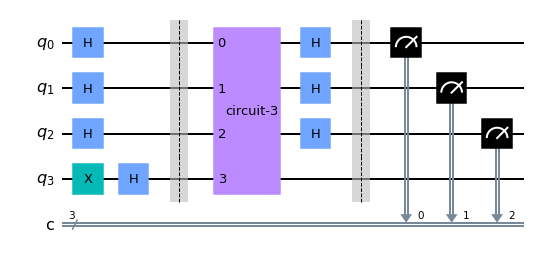

In [20]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    ## TODO

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.barrier()

# Add oracle. Note the alternative way to add a gate using +=, like we're appending to a list!
dj_circuit.compose(test_f, inplace=True)

# Repeat H-gates
for qubit in range(n):
    # TODO
dj_circuit.barrier()


# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw(output='mpl')

Let's see the results! Remember, we expect 1 if test_f is balanced, and 0 if not. We should get 0% 0:

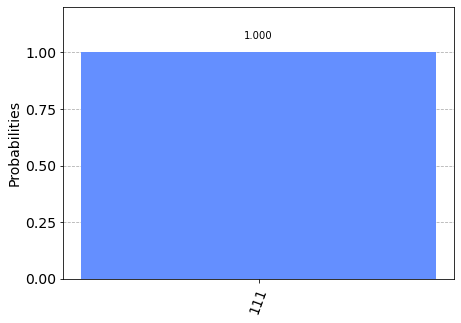

In [21]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')

#we use transpile instead of assemble because not all backends 
qobj = transpile(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)